In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')
sns.set_style("whitegrid")


In [10]:
new_player_data = pd.read_csv('all_data.csv')

In [11]:
new_player_data.head()

,PLAYER,Year,advanced_OFFRTG,advanced_DEFRTG,advanced_NETRTG,advanced_AST%,advanced_AST/TO,advanced_AST Ratio,advanced_OREB%,advanced_DREB%,...,use_%DREB,use_%REB,use_%AST,use_%TOV,use_%STL,use_%BLK,use_%BLKA,use_%PF,use_%PFD,use_%PTS
0,_2000_Chris Gatling,2000,99.4,100.6,-1.3,6.8,0.42,5.9,8.0,18.4,...,30.1,29.5,9.0,25.6,26.7,10.6,26.8,25.0,4.2,27.2
1,_2000_Allen Iverson,2000,102.0,99.9,2.0,22.0,1.43,12.8,2.4,7.0,...,11.3,10.3,24.5,26.0,24.8,1.7,35.3,11.8,2.3,34.3
2,_2000_Shaquille O'Neal,2000,107.7,96.2,11.5,18.4,1.34,11.8,10.5,21.9,...,33.7,34.9,18.9,24.7,7.5,53.7,23.5,18.6,0.7,35.0
3,_2000_Karl Malone,2000,109.4,100.7,8.6,19.7,1.32,13.0,6.4,22.3,...,34.2,32.1,18.4,26.6,15.6,22.3,27.7,15.4,1.5,33.8
4,_2000_Tim Duncan,2000,103.6,95.0,8.6,15.2,0.97,11.5,9.8,21.7,...,32.9,34.5,17.2,26.8,15.1,39.2,32.5,17.1,1.4,29.7


In [12]:
print(new_player_data.isnull().sum())

PLAYER              0
Year                0
advanced_OFFRTG     0
advanced_DEFRTG     0
advanced_NETRTG     0
                   ..
use_%BLK           10
use_%BLKA          10
use_%PF            10
use_%PFD           10
use_%PTS           10
Length: 72, dtype: int64


In [13]:
new_player_data.fillna(0, inplace=True)
print(new_player_data.isnull().sum())

PLAYER             0
Year               0
advanced_OFFRTG    0
advanced_DEFRTG    0
advanced_NETRTG    0
                  ..
use_%BLK           0
use_%BLKA          0
use_%PF            0
use_%PFD           0
use_%PTS           0
Length: 72, dtype: int64


In [14]:
print("Descriptive Statistics:")
print(new_player_data.describe())

Descriptive Statistics:
               Year  advanced_OFFRTG  advanced_DEFRTG  advanced_NETRTG  \
count  10471.000000     10471.000000     10471.000000     10471.000000   
mean    2011.465763       102.684920       104.341056        -1.656528   
std        6.688594         7.354708         6.331114         8.524562   
min     2000.000000        18.200000        40.500000      -106.800000   
25%     2006.000000        99.000000       100.800000        -5.700000   
50%     2012.000000       103.200000       104.400000        -1.100000   
75%     2017.000000       107.000000       108.000000         3.100000   
max     2022.000000       158.300000       184.600000        98.200000   

       advanced_AST%  advanced_AST/TO  advanced_AST Ratio  advanced_OREB%  \
count   10471.000000     10471.000000        10471.000000    10471.000000   
mean       13.263652         1.504926           15.857120        4.795874   
std         9.157037         0.948713            8.562507        3.519144   
m

## Correlation Matrix

This heatmap provides a visualization of the correlation coefficients between all pairs of statistics in the dataset. A correlation matrix is a useful tool for understanding the relationships between multiple variables at once. High positive or negative values indicate a strong relationship, while values near zero indicate a weak relationship.

- **Positive correlation** suggests that as one variable increases, the other variable also increases.
- **Negative correlation** indicates that as one variable increases, the other decreases.

This matrix can help identify which stats tend to rise and fall together, which can be useful for feature selection in modeling or for identifying redundant variables.


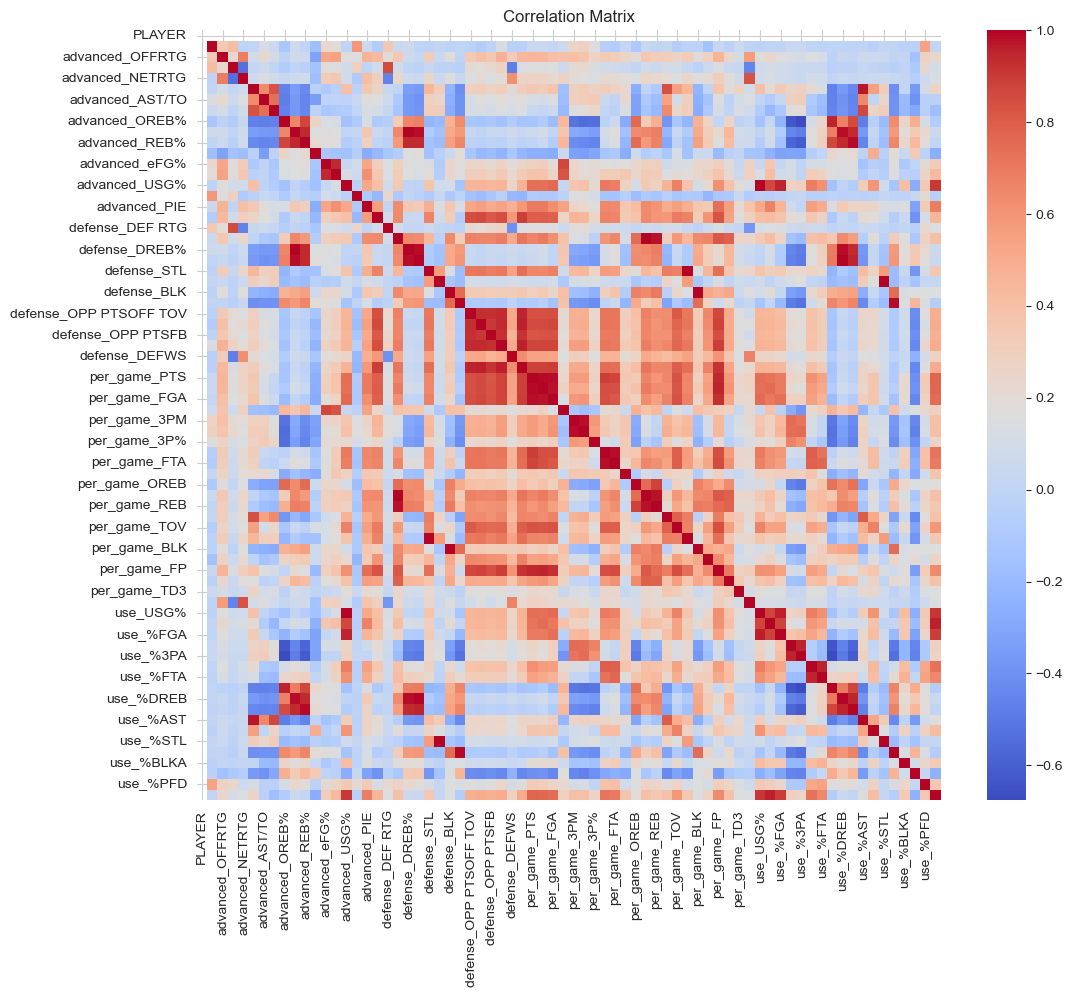

In [16]:
new_player_data_numeric = new_player_data.apply(pd.to_numeric, errors='coerce')
new_player_data_numeric.fillna(0, inplace=True)
correlation_matrix = new_player_data_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()


## Histograms of Advanced Metrics

This visualization showcases the distribution of several critical advanced metrics for all players within the dataset. These histograms help us understand the variability and central tendency of each statistic, which are fundamental for assessing player performance and identifying typical versus exceptional outputs.

- **Advanced Offensive Rating (`advanced_OFFRTG`)**: Measures the efficiency of a player or team per 100 possessions on offense.
- **Advanced Defensive Rating (`advanced_DEFRTG`)**: Measures the efficiency of a player or team per 100 possessions on defense.
- **Effective Field Goal Percentage (`advanced_eFG%`)**: Adjusts the field goal percentage to account for the fact that 3-point field goals count for more than 2-point field goals.
- **Three-Point Percentage (`per_game_3P%`)**: Indicates a player's accuracy from the three-point line.

Each histogram includes a Kernel Density Estimate (KDE) to better visualize the shape of the distribution. Understanding these distributions is crucial for forming insights about player performance efficiencies and shooting accuracies.
players.


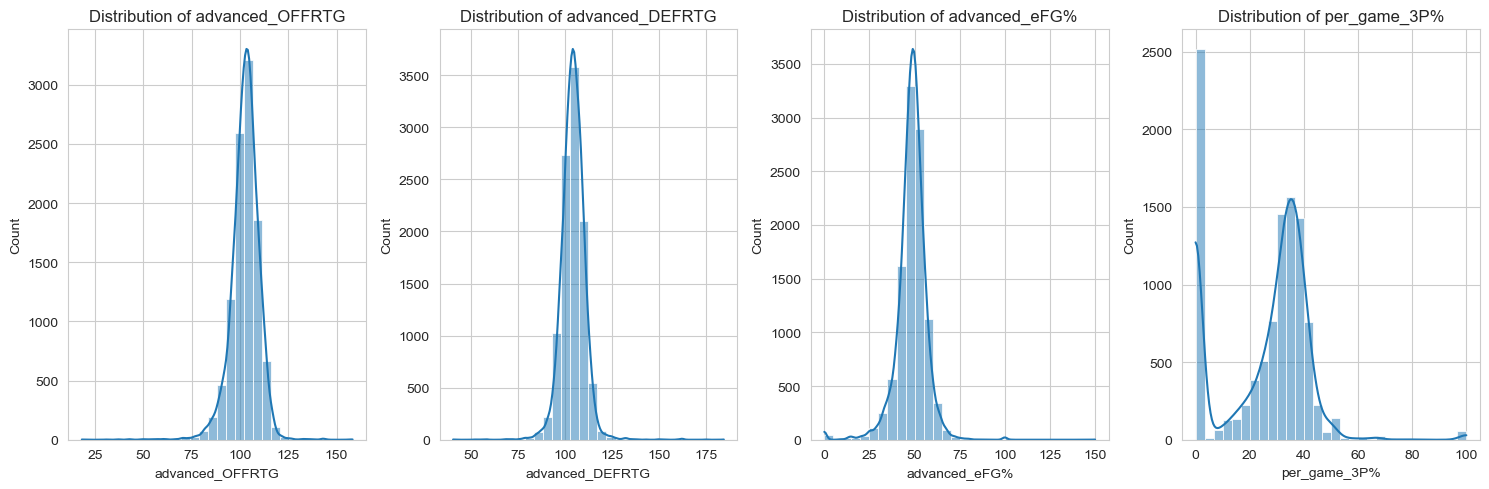

In [20]:
plt.figure(figsize=(15, 5))
features = ['advanced_OFFRTG', 'advanced_DEFRTG', 'advanced_eFG%', 'per_game_3P%']
for i, feature in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.histplot(new_player_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


## Scatter Plot: Offensive vs Defensive Rating

This scatter plot compares the offensive and defensive ratings of players. It helps visualize the balance or trade-off between a player's offensive capabilities and defensive responsibilities.

- **X-axis (`advanced_OFFRTG`)**: Represents each player's offensive rating.
- **Y-axis (`advanced_DEFRTG`)**: Represents each player's defensive rating.

Players in the top-right quadrant excel in both offensive and defensive aspects, potentially indicating all-round players. Those in the bottom-left may struggle in both areas, while others might excel in one while being weaker in the other.


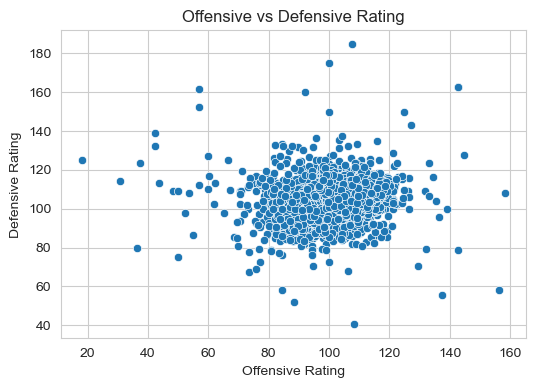

In [21]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='advanced_OFFRTG', y='advanced_DEFRTG', data=new_player_data)
plt.title('Offensive vs Defensive Rating')
plt.xlabel('Offensive Rating')
plt.ylabel('Defensive Rating')
plt.show()


In [22]:
new_player_data.columns

Index(['PLAYER', 'Year', 'advanced_OFFRTG', 'advanced_DEFRTG',
       'advanced_NETRTG', 'advanced_AST%', 'advanced_AST/TO',
       'advanced_AST Ratio', 'advanced_OREB%', 'advanced_DREB%',
       'advanced_REB%', 'advanced_TO Ratio', 'advanced_eFG%', 'advanced_TS%',
       'advanced_USG%', 'advanced_PACE', 'advanced_PIE', 'advanced_POSS',
       'defense_DEF RTG', 'defense_DREB', 'defense_DREB%', 'defense_%DREB',
       'defense_STL', 'defense_STL%', 'defense_BLK', 'defense_%BLK',
       'defense_OPP PTSOFF TOV', 'defense_OPP PTS2ND CHANCE',
       'defense_OPP PTSFB', 'defense_OPP PTSPAINT', 'defense_DEFWS',
       'per_game_MIN', 'per_game_PTS', 'per_game_FGM', 'per_game_FGA',
       'per_game_FG%', 'per_game_3PM', 'per_game_3PA', 'per_game_3P%',
       'per_game_FTM', 'per_game_FTA', 'per_game_FT%', 'per_game_OREB',
       'per_game_DREB', 'per_game_REB', 'per_game_AST', 'per_game_TOV',
       'per_game_STL', 'per_game_BLK', 'per_game_PF', 'per_game_FP',
       'per_game_DD2', 'per

## Player Performance Trends Over Time

This visualization displays the year-over-year trends for offensive and defensive ratings across all players in the dataset. Observing these trends can help identify overall changes in player performance metrics within the league, potentially reflecting shifts in playing styles, rule changes, or improvements in player skills and strategies.

- **Offensive Rating** measures how many points a player or team produces per 100 possessions.
- **Defensive Rating** indicates how many points a player or team allows per 100 possessions.

The lines represent the average ratings for each year, providing insights into how the balance between offense and defense has evolved.


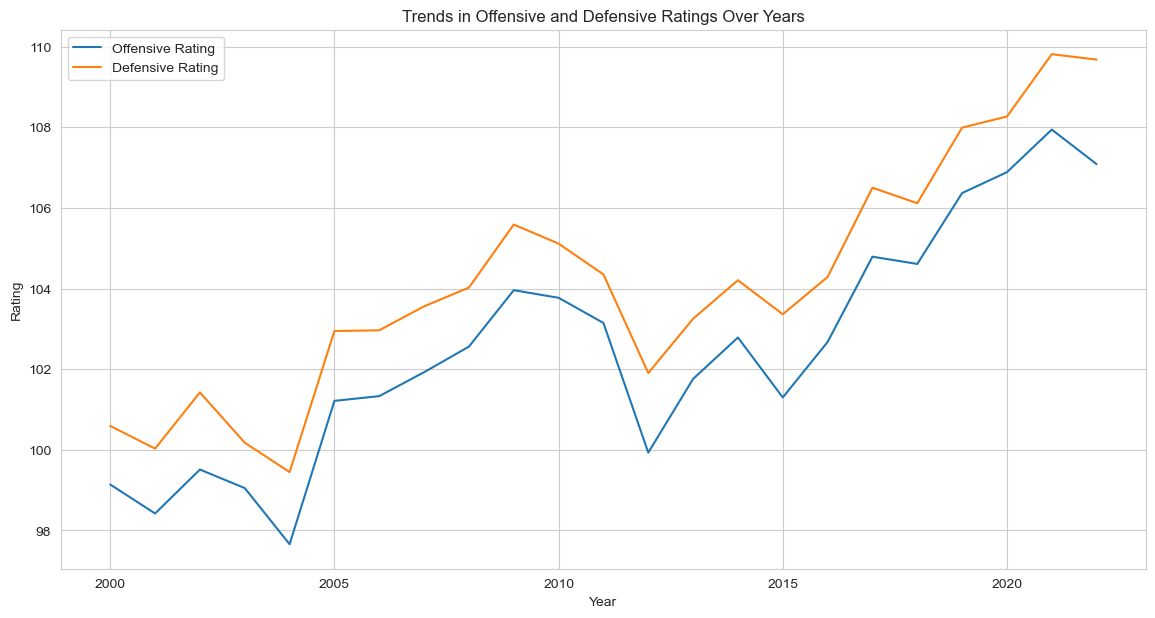

In [24]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=new_player_data, x='Year', y='advanced_OFFRTG', label='Offensive Rating', errorbar=None)
sns.lineplot(data=new_player_data, x='Year', y='advanced_DEFRTG', label='Defensive Rating', errorbar=None)
plt.title('Trends in Offensive and Defensive Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()
plt.show()


## Pair Plot of Selected Performance Metrics

The pair plot below provides a comprehensive visualization of relationships between selected performance metrics that combine offensive and defensive ratings with usage percentages and per-game statistics. This multi-variable plot can help us identify patterns, trends, and potential correlations among these variables:

- **Advanced Offensive Rating (`advanced_OFFRTG`)**: Measures how efficiently a player contributes to scoring per 100 possessions.
- **Advanced Defensive Rating (`advanced_DEFRTG`)**: Evaluates a player's defensive efficiency per 100 possessions.
- **Usage Percentage of Field Goals Made (`use_%FGM`)**: Indicates the percentage of team's field goals made by the player while they are on the court.
- **Usage Percentage of 3-Point Field Goals Made (`use_%3PM`)**: Reflects the percentage of team's 3-point field goals made by the player while they are on the court.
- **Usage Percentage of Free Throws Made (`use_%FTM`)**: Represents the percentage of team's free throws made by the player.
- **Per Game Plus-Minus (`per_game_+/-`)**: Measures the net score impact a player has on their team while they are on the court.

Analyzing these features together can provide insights into how a player's involvement in shooting impacts their overall game performance and their team's success. The pair plot facilitates a quick visual assessment of these relationships and can uncover hidden patterns that might not be evident through simple statistical analysis.


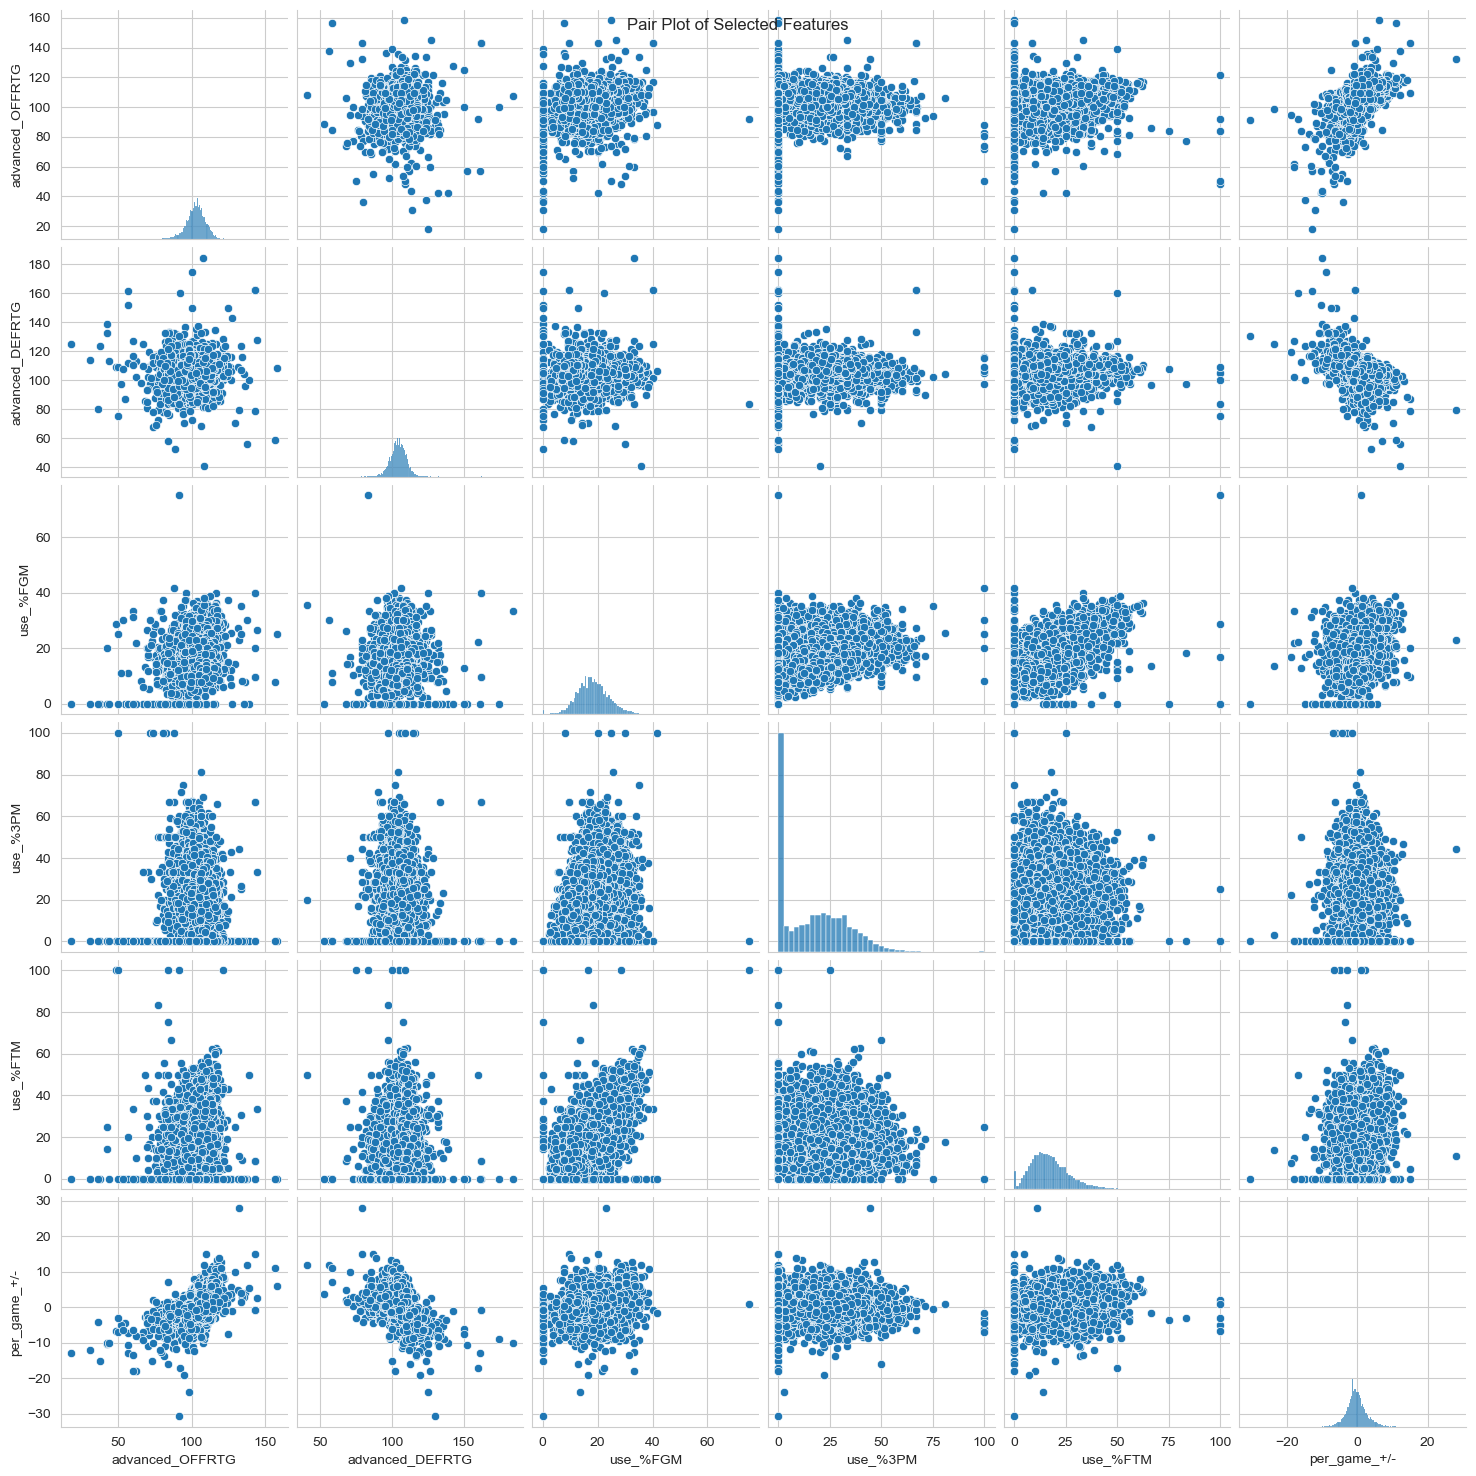

In [26]:
selected_features = ['advanced_OFFRTG', 'advanced_DEFRTG', 'use_%FGM', 'use_%3PM', 'use_%FTM' , 'per_game_+/-' ]

sns.pairplot(new_player_data[selected_features])
plt.suptitle('Pair Plot of Selected Features', verticalalignment='top')
plt.show()


## Impact of Usage on Performance

This pair plot explores the relationship between player usage percentages and their shooting efficiency metrics. Usage percentage is a measure of team plays utilized by a player while they are in the game, which can directly impact their performance efficiency.

- **Usage Percentage (`use_USG%`)**: An estimation of the percentage of team plays used by a player while on the floor.
- **Points Usage Percentage (`use_%PTS`)**: How much of the team's scoring a player accounts for.
- **True Shooting Percentage (`advanced_TS%`)**: A measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.
- **Effective Field Goal Percentage (`advanced_eFG%`)**: This metric adjusts the field goal percentage to account for the fact that 3-point field goals count for more than 2-point field goals.

Analyzing these metrics together helps understand how a player's involvement in plays affects their efficiency, providing valuable insights for coaching strategies and player development.


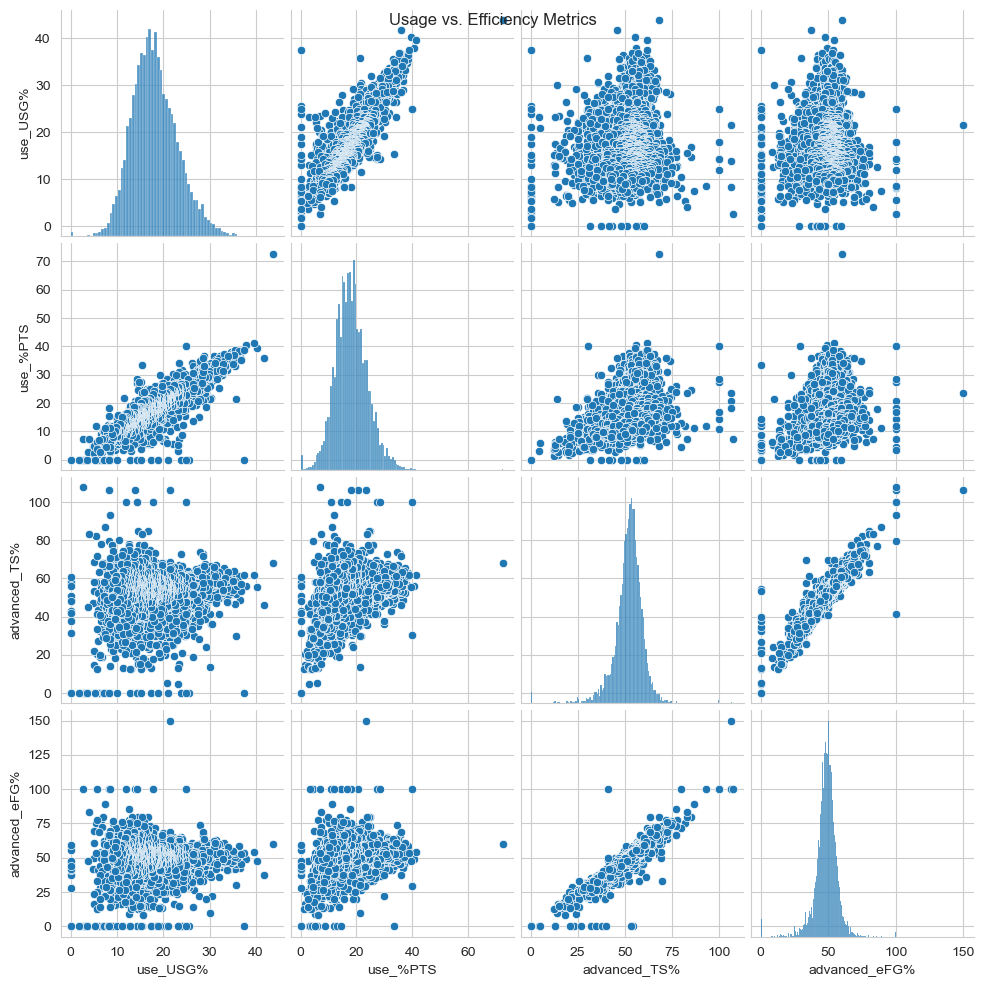

In [31]:

usage_features = ['use_USG%', 'use_%PTS', 'advanced_TS%', 'advanced_eFG%']

sns.pairplot(new_player_data[usage_features])
plt.suptitle('Usage vs. Efficiency Metrics')
plt.show()


## Correlation Heatmap of Selected Performance Metrics

The heatmap below shows the correlation matrix for key performance metrics including points per game, assists per game, rebounds per game, net rating, and player impact estimate. These metrics provide a broad view of player contributions during games.

- **Points per Game (`per_game_PTS`)**: The average number of points scored by a player per game.
- **Assists per Game (`per_game_AST`)**: The average number of assists a player records per game.
- **Rebounds per Game (`per_game_REB`)**: The average number of rebounds a player collects per game.
- **Net Rating (`advanced_NETRTG`)**: A metric that calculates the difference between a team’s offensive and defensive ratings.
- **Player Impact Estimate (`advanced_PIE`)**: A measure that estimates a player's overall statistical contribution against the total statistics in games they play in.

This correlation analysis helps in understanding how different aspects of performance are interrelated. For example, a high correlation between points per game and player impact estimate might indicate that scoring is a significant contributor to a player's overall impact on the game.


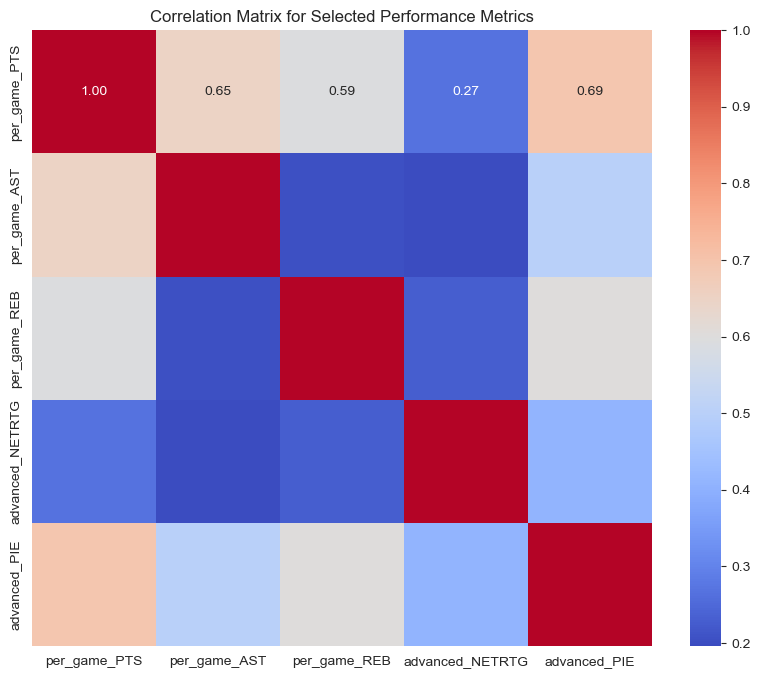

In [30]:
performance_features = ['per_game_PTS', 'per_game_AST', 'per_game_REB', 'advanced_NETRTG', 'advanced_PIE']
performance_corr = new_player_data[performance_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(performance_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Performance Metrics')
plt.show()
